### 6.4 Machine Learning Part 1
#### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\kelly\OneDrive\Desktop\Campsite Prepared Data\up_to_date_data.csv")

### 2. Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'longitude', 'latitude', 'name',
       'park_type', 'dates_open', 'comments', 'num_sites', 'elevation',
       'amenities', 'state', 'nearest_town_distance', 'nearest_town_bearing',
       'city'],
      dtype='object')

In [6]:
df.head(20)

Unnamed: 0.1  Unnamed: 0  longitude  latitude  \
0             51        1091    -88.324    46.325   
1             56        1196    -88.402    46.531   
2            163        2119   -103.363    48.279   
3            261        2261   -101.327    47.615   
4            335        2374    -98.077    41.987   
5            346        2388    -97.544    42.502   
6            353        2396    -98.069    40.196   
7            386        2448    -97.456    41.835   
8            392        2457    -99.923    41.292   
9            394        2459    -99.998    40.866   
10           406        2480    -99.453    40.134   
11           444        2540    -98.057    41.031   
12           501        2741   -103.435    43.884   
13           591        3082    -89.687    44.921   
14           621        3297    -68.859    45.920   
15           630        3328    -71.224    44.572   
16           679        3581    -77.778    41.723   
17           699        3653    -79.974    37.985   
18           724        3726    -81.426    36.746   
19           762        3811    -81.129    37.516   

                                      name park_type          dates_open  \
0                 Deer Lake - State Forest        SF            all year   
1   King Lake - Copper County State Forest        SF            all year   
2                           Epping RV Park        CP   early may-mid oct   
3               Sportsmens Centennial Park        CP  early may-late sep   
4                          Elgin City Park        CP   early may-mid oct   
5                      Gladstone City Park        CP    mid apr-late sep   
6                             Harbine Park        CP            all year   
7             Memorial City Park - Madison        CP            all year   
8                    Morgan Municipal Park        CP            all year   
9                                Muny Park        CP            all year   
10                    Orleans City RV Park        CP            all year   
11                             Tooley Park        CP            all year   
12                 Grizzly Creek Primative        NF    mid may-late aug   
13                 Rib Mountain State Park        SP            all year   
14       Roaring Brook - Baxter State Park        SP     mid may-mid oct   
15                   Milan Hill State Park        SP  early jun-late sep   
16                    Lyman Run State Park        SP   early apr-mid dec   
17                          Bolar Mountain        NF  early apr-late nov   
18                          Raccoon Branch        NF    mid apr-late dec   
19        Blue Jay - Camp Creek State Park        SP     mid apr-mid oct   

                                             comments  num_sites  elevation  \
0                    open all year but snow may block         12     1569.0   
1                    open all year but snow may block          6     1662.0   
2                                 may be full - check         12     2203.0   
3                                                swim        121     1869.0   
4                                                swim          8     1926.0   
5                                                swim          7     1756.0   
6                                                swim          5     1683.0   
7                                                swim         13     1581.0   
8                                                swim         30     2546.0   
9                                                swim         30     2494.0   
10                                               swim          8     2039.0   
11                     unknown facilities - tent only          5     1729.0   
12   no towed vehicles - one 28 foot vehicle per site         20     4606.0   
13                             closed for 2010 season         30     1798.0   
14  for reservations go to www.baxterstateparkauth...         10     1523.0   
15                           

In [7]:
df.shape

(150, 15)

In [11]:
#Drop columns 'Unnamed:0.1' and 'Unnamed:0'

df_2 = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [12]:
df_2.columns

Index(['longitude', 'latitude', 'name', 'park_type', 'dates_open', 'comments',
       'num_sites', 'elevation', 'amenities', 'state', 'nearest_town_distance',
       'nearest_town_bearing', 'city'],
      dtype='object')

#### Missing values

In [13]:
# Check for missing values

df_2.isnull().sum()

# No missing values to handle

longitude                0
latitude                 0
name                     0
park_type                0
dates_open               0
comments                 0
num_sites                0
elevation                0
amenities                0
state                    0
nearest_town_distance    0
nearest_town_bearing     0
city                     0
dtype: int64

#### Duplicates check

In [14]:
dups = df_2.duplicated()

In [15]:
dups.shape # No dups

(150,)

#### Extreme values check

In [17]:
sns.distplot(df_2['nearest_town_distance'], bins=25) # Shows extreme values

C:\Users\kelly\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='nearest_town_distance', ylabel='Density'>

In [18]:
df_2['nearest_town_distance'].mean() # Check the mean

10.564

In [19]:
df['nearest_town_distance'].median() # Check the median

7.9

In [20]:
df['nearest_town_distance'].max() # Check the max

36.5

### 3. Data prep for regression analysis

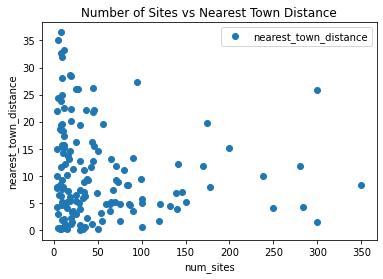

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'num_sites', y='nearest_town_distance',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Sites vs Nearest Town Distance')  
plt.xlabel('num_sites')  
plt.ylabel('nearest_town_distance')  
plt.show()

#### Hypothesis:

#### A campsite with fewer campsites are going to be located closer to the nearest town.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['num_sites'].values.reshape(-1,1)
y = df['nearest_town_distance'].values.reshape(-1,1)

In [23]:
X

array([[ 12],
       [  6],
       [ 12],
       [121],
       [  8],
       [  7],
       [  5],
       [ 13],
       [ 30],
       [ 30],
       [  8],
       [  5],
       [ 20],
       [ 30],
       [ 10],
       [ 10],
       [ 35],
       [ 90],
       [ 20],
       [ 13],
       [ 10],
       [ 45],
       [ 15],
       [ 38],
       [ 80],
       [ 51],
       [ 70],
       [ 25],
       [ 46],
       [ 65],
       [ 10],
       [ 44],
       [350],
       [150],
       [ 25],
       [  9],
       [  4],
       [ 60],
       [250],
       [ 90],
       [120],
       [  9],
       [141],
       [ 22],
       [ 10],
       [283],
       [146],
       [  4],
       [ 87],
       [100],
       [178],
       [ 44],
       [ 26],
       [ 21],
       [ 36],
       [  4],
       [  9],
       [  4],
       [ 64],
       [132],
       [ 15],
       [ 11],
       [ 12],
       [ 21],
       [ 65],
       [  7],
       [  9],
       [  4],
       [ 35],
       [ 15],
       [ 71],
      

In [24]:
y

array([[15.7],
       [ 6.5],
       [ 0.3],
       [ 4.8],
       [ 0.4],
       [ 0.2],
       [ 0.4],
       [ 0.5],
       [ 0. ],
       [ 0.9],
       [ 0.2],
       [ 3. ],
       [ 1.1],
       [ 3.9],
       [19.5],
       [ 1.9],
       [ 7.1],
       [13.3],
       [ 2.2],
       [ 1.1],
       [ 4.7],
       [12.8],
       [ 4. ],
       [ 2.3],
       [11. ],
       [ 0.2],
       [ 5.2],
       [ 6.4],
       [15.6],
       [ 5.2],
       [15.7],
       [ 1.2],
       [ 8.4],
       [ 5.1],
       [ 5.4],
       [36.5],
       [ 9.9],
       [ 4.8],
       [ 4. ],
       [ 3.6],
       [ 1.7],
       [18.5],
       [12.1],
       [11.2],
       [ 9.2],
       [ 4.3],
       [ 7. ],
       [ 4.2],
       [ 4.7],
       [ 4.9],
       [ 7.9],
       [16.3],
       [26. ],
       [ 3.3],
       [ 6.3],
       [21.9],
       [ 6.2],
       [ 7.9],
       [ 3.5],
       [ 4.4],
       [ 0.2],
       [14.2],
       [ 2.1],
       [ 1.4],
       [13.1],
       [18.6],
       [23

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression() 

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Sites vs Nearest Town Distance (Test set)')
plot_test.xlabel('Number of Sites')
plot_test.ylabel('Nearest Town Distance')
plot_test.show()

#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The linear model represented by the red regression line doesn't cover all of the data points.  In fact, there are few points that are even near the line.  There seems to be very few campsites with a lot of sites available for camping far from town.  This is in agreement with my hypotheses.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00854737]]
Mean squared error:  60.55927738929076
R2 score:  -0.14608562065952313


In [32]:
y_predicted

array([[11.45654697],
       [11.83263114],
       [10.65309443],
       [11.84972588],
       [11.82408377],
       [11.20867331],
       [10.90951545],
       [11.07191543],
       [11.32833646],
       [11.55056801],
       [10.7385681 ],
       [11.55911538],
       [11.31124172],
       [11.62749432],
       [11.75570483],
       [11.4223575 ],
       [11.29414699],
       [11.82408377],
       [ 9.51629455],
       [11.63604169],
       [11.79844167],
       [11.85827324],
       [11.25141015],
       [11.67877853],
       [11.77279957],
       [11.80698904],
       [11.84972588],
       [11.7642522 ],
       [11.90101008],
       [11.33688383],
       [10.48214708],
       [11.47364171],
       [11.72151536],
       [11.67877853],
       [ 9.3709893 ],
       [10.80694704],
       [11.7642522 ],
       [11.79844167],
       [11.84117851],
       [11.84117851],
       [11.84972588],
       [11.83263114],
       [11.56766275],
       [11.74715747],
       [11.86682061]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0     19.5  11.456547
1      2.1  11.832631
2      5.1  10.653094
3     31.9  11.849726
4      0.5  11.824084
5      8.4  11.208673
6      1.7  10.909515
7      0.6  11.071915
8      9.3  11.328336
9     21.8  11.550568
10     3.9  10.738568
11    16.3  11.559115
12     8.8  11.311242
13     6.3  11.627494
14     1.4  11.755705
15     4.8  11.422358
16     1.7  11.294147
17    12.2  11.824084
18     4.3   9.516295
19     7.1  11.636042
20     7.2  11.798442
21    23.9  11.858273
22    11.0  11.251410
23     0.0  11.678779
24     6.1  11.772800
25     4.0  11.806989
26     9.2  11.849726
27    20.2  11.764252
28    14.9  11.901010
29     5.2  11.336884

#### Compare the predicted y values with the actual y values in a dataframe.

There's quite a difference between the actual and predicted y values.  This adds value to the fact that the model isn't doing a great job of explaining the relationship betwen the "Number of Sites" and "Nearest Town Distance" variables.  The relationship doesn't follow a single, straight regression line.

#### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00854737]]
Mean squared error:  80.99290670065463
R2 score:  0.003996458193659902


In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Sites vs Nearest Town Distance (Train set)')
plot_test.xlabel('Number of Sites')
plot_test.ylabel('Nearest Town Distance')
plot_test.show()

#### Include your thoughts on how well the model performed on the test set in a markdown cell.
##### Include any reflections you have on the impact of possible data bias.

The model fits the training set only slightly better than the test set.  The relationship I was looking for isn't purely linear.  My hypothesis is only partially true.  There's still a lot of variance in the data that can't be explained by the linear relationship between the variables.  I could create another hypotheses that would more accurately represent the data.  There a number of campsites with fewer sites available that are located closer to town. 

I believe I did not have enough observations in my data to create any kind of sound result.  After all of the cleaning of the original data, there are only 150 rows of data.  I should have at least 5,000 in order to a more reasonable representation of the data.